Sentiment  Negative  Neutral  Positive
Brand                                 
BrandA           85      128       142
BrandB           57      134       135
BrandC           64      137       118


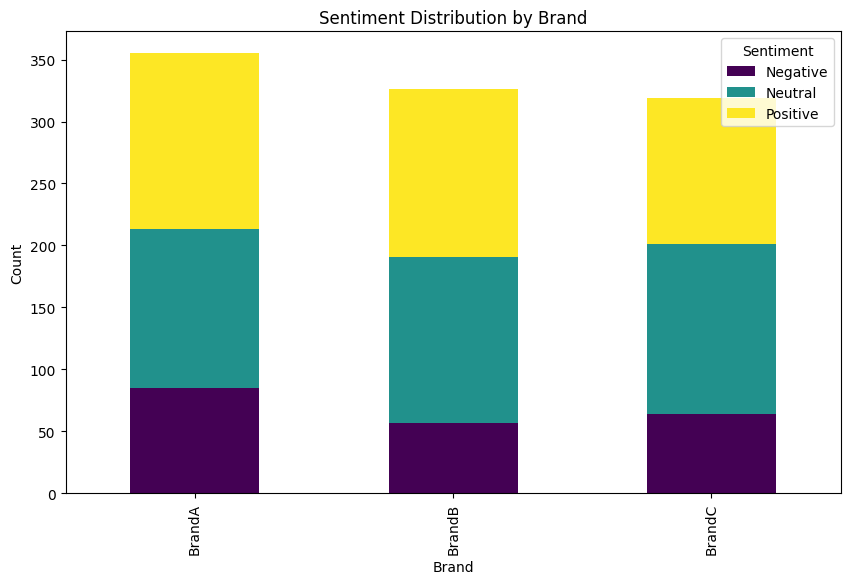

Sentiment   Negative  Neutral  Positive
Date                                   
2023-01-01         5        9        10
2023-01-02         5        9        10
2023-01-03         5        9        10
2023-01-04         5       10         9
2023-01-05         4       10        10
2023-01-06         9       11         4
2023-01-07         3        9        12
2023-01-08         3       11        10
2023-01-09         2        9        13
2023-01-10         5        5        14
2023-01-11         5       11         8
2023-01-12         5        9        10
2023-01-13         1       10        13
2023-01-14         6       12         6
2023-01-15        10        6         8
2023-01-16         5        8        11
2023-01-17         4       10        10
2023-01-18         7        8         9
2023-01-19         7        8         9
2023-01-20         6       11         7
2023-01-21         6       10         8
2023-01-22         6        9         9
2023-01-23         3       12         9


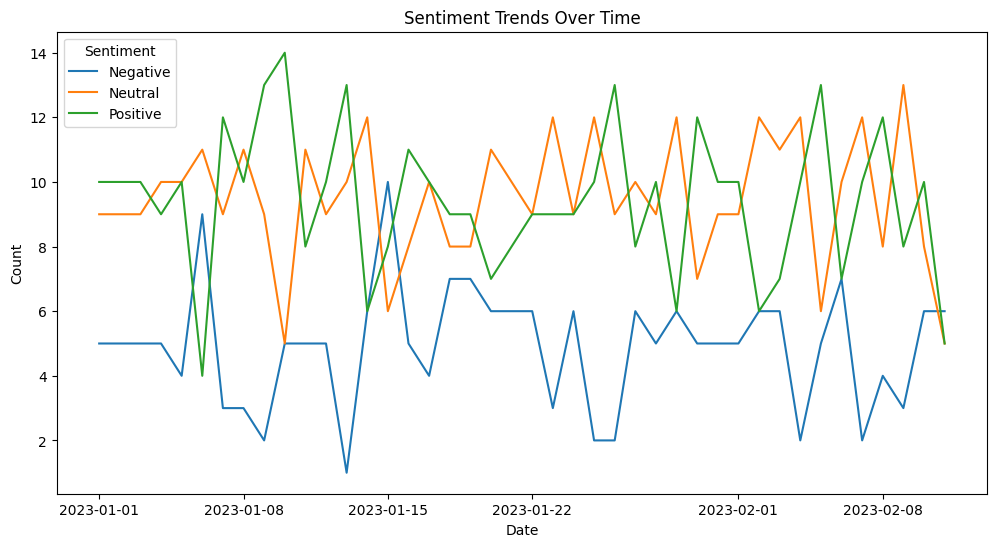

Sentiment  Negative               Neutral               Positive              
Brand        BrandA BrandB BrandC  BrandA BrandB BrandC   BrandA BrandB BrandC
Date                                                                          
2023-01-01      1.0    1.0    3.0     2.0    4.0    3.0      4.0    3.0    3.0
2023-01-02      2.0    2.0    1.0     4.0    0.0    5.0      2.0    3.0    5.0
2023-01-03      1.0    3.0    1.0     2.0    5.0    2.0      2.0    6.0    2.0
2023-01-04      1.0    3.0    1.0     5.0    2.0    3.0      4.0    4.0    1.0
2023-01-05      1.0    0.0    3.0     4.0    3.0    3.0      4.0    1.0    5.0
2023-01-06      2.0    1.0    6.0     4.0    3.0    4.0      0.0    2.0    2.0
2023-01-07      1.0    1.0    1.0     3.0    3.0    3.0      5.0    1.0    6.0
2023-01-08      1.0    1.0    1.0     3.0    5.0    3.0      5.0    2.0    3.0
2023-01-09      0.0    0.0    2.0     4.0    3.0    2.0      6.0    5.0    2.0
2023-01-10      3.0    2.0    0.0     2.0    1.0    

TypeError: Index must be a MultiIndex

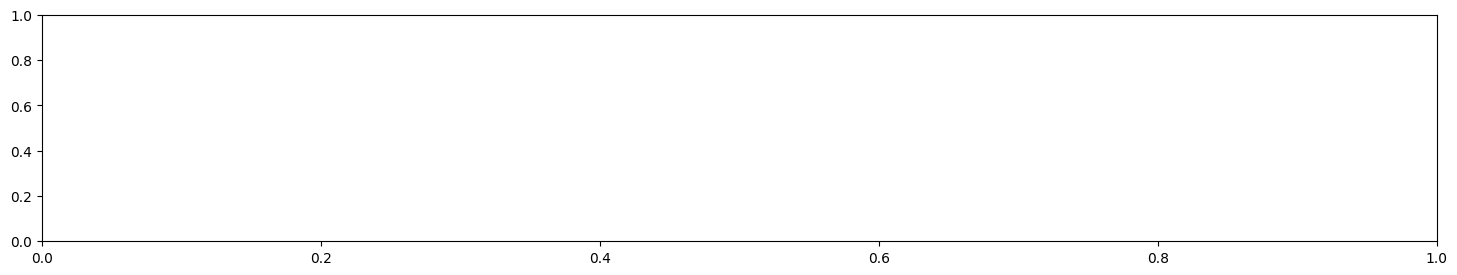

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a synthetic dataset
np.random.seed(42)

n_samples = 1000
data = {
    'PostID': np.arange(1, n_samples + 1),
    'Date': pd.date_range(start='2023-01-01', periods=n_samples, freq='H'),
    'Brand': np.random.choice(['BrandA', 'BrandB', 'BrandC'], size=n_samples),
    'Sentiment': np.random.choice(['Positive', 'Neutral', 'Negative'], size=n_samples, p=[0.4, 0.4, 0.2]),
    'Text': np.random.choice([
        'Great product!', 'Not satisfied.', 'Could be better.', 'Loved it!', 'Terrible experience.',
        'Absolutely amazing!', 'Just okay.', 'Would not recommend.', 'Exceeded expectations!', 'Worst ever.'
    ], size=n_samples)
}

df_social_media = pd.DataFrame(data)

# Analyze sentiment patterns by brand
sentiment_by_brand = df_social_media.groupby(['Brand', 'Sentiment']).size().unstack().fillna(0)
print(sentiment_by_brand)

# Visualize sentiment distribution by brand
plt.figure(figsize=(10, 6))
sentiment_by_brand.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Sentiment Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

# Analyze sentiment trends over time
sentiment_over_time = df_social_media.groupby([df_social_media['Date'].dt.date, 'Sentiment']).size().unstack().fillna(0)
print(sentiment_over_time)

# Visualize sentiment trends over time
plt.figure(figsize=(12, 6))
sentiment_over_time.plot(kind='line', ax=plt.gca())
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

# Additional analysis: Sentiment distribution per brand over time
sentiment_brand_time = df_social_media.groupby([df_social_media['Date'].dt.date, 'Brand', 'Sentiment']).size().unstack().fillna(0).unstack().fillna(0)
print(sentiment_brand_time)

plt.figure(figsize=(18, 10))
for brand in sentiment_by_brand.index:
    plt.subplot(3, 1, sentiment_by_brand.index.get_loc(brand) + 1)
    sentiment_brand_time.xs(brand, level=1).plot(kind='line', ax=plt.gca())
    plt.title(f'Sentiment Trends Over Time for {brand}')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend(title='Sentiment')
    plt.tight_layout()

plt.show()
